In [ ]:
# !pip install missingpy

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random as rd
import os
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from scipy import stats

In [7]:
%matplotlib inline

# @grellert: removendo warnings chatos
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [17]:
df = pd.read_csv(os.path.join('..','dados', 'brutos', 'heart_disease_dataset.csv'))

In [18]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
0,67,1,2,111,536,0,2,88,0,1.3,3,2,3,1,0,23.4,1
1,57,1,3,109,107,0,2,119,0,5.4,2,0,3,0,1,35.4,0
2,43,1,4,171,508,0,1,113,0,3.7,3,0,7,1,1,29.9,0
3,71,0,4,90,523,0,2,152,0,4.7,2,1,3,1,0,15.2,1
4,36,1,2,119,131,0,2,128,0,5.9,3,1,3,1,0,16.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,52,0,1,169,479,0,0,124,0,3.7,2,3,3,0,0,27.8,0
3065,75,0,4,90,372,0,2,141,0,2.1,2,2,3,0,1,37.0,1
3066,68,1,4,166,564,0,1,76,0,4.5,3,1,3,0,0,16.1,1
3067,66,0,3,143,113,1,1,207,0,3.6,1,0,6,0,0,27.7,0


In [19]:
df = df.dropna()
print(df)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      67    1   2       111   536    0        2       88      0      1.3   
1      57    1   3       109   107    0        2      119      0      5.4   
2      43    1   4       171   508    0        1      113      0      3.7   
3      71    0   4        90   523    0        2      152      0      4.7   
4      36    1   2       119   131    0        2      128      0      5.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
3064   52    0   1       169   479    0        0      124      0      3.7   
3065   75    0   4        90   372    0        2      141      0      2.1   
3066   68    1   4       166   564    0        1       76      0      4.5   
3067   66    0   3       143   113    1        1      207      0      3.6   
3068   38    1   4       100   507    0        1      187      0      0.9   

      slope  ca  thal  smoking  diabetes   bmi  heart_disease  
0         3

In [20]:
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

In [21]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
count,3069.00000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000
mean,52.50114,0.555556,2.489736,145.306289,347.219941,0.145650,1.004236,135.157380,0.176279,3.189052,2.023786,0.626588,4.544477,0.348974,0.193874,27.496839,0.388074
std,13.70752,0.496985,1.110417,31.602321,146.853319,0.352813,0.812016,43.353197,0.381119,1.802815,0.817679,0.891447,1.751064,0.476723,0.395396,7.281731,0.487391
min,29.00000,0.000000,1.000000,90.000000,100.000000,0.000000,0.000000,60.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,15.000000,0.000000
25%,41.00000,0.000000,2.000000,118.000000,215.000000,0.000000,0.000000,98.000000,0.000000,1.600000,1.000000,0.000000,3.000000,0.000000,0.000000,21.300000,0.000000
50%,53.00000,1.000000,2.000000,146.000000,350.000000,0.000000,1.000000,135.000000,0.000000,3.200000,2.000000,0.000000,3.000000,0.000000,0.000000,27.400000,0.000000
75%,64.00000,1.000000,3.000000,172.000000,475.000000,0.000000,2.000000,172.000000,0.000000,4.700000,3.000000,1.000000,6.000000,1.000000,0.000000,33.900000,1.000000
max,76.00000,1.000000,4.000000,200.000000,600.000000,1.000000,2.000000,210.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000,1.000000,40.000000,1.000000


In [22]:
TH_CATEGORICO = 5
categoricos = [] 
string = []
quantitativos = []
nao_numericos = []

for col in df:
    print(col, df[col].unique())
    unicos = df[col].unique()
    ## dividindo colunas entre valores categoricos e quantitativos:
    if unicos.shape[0] < TH_CATEGORICO:
        categoricos.append(col)
    else: 
        quantitativos.append(col)
print(f'colunas categoricas: {len(categoricos)}, quantitativas: {len(quantitativos)}')

age [67 57 43 71 36 49 47 51 39 52 64 68 31 50 30 72 58 66 61 40 53 55 70 56
 44 75 65 35 37 46 32 42 54 48 63 45 34 62 38 59 76 73 69 29 33 41 60 74]
sex [1 0]
cp [2 3 4 1]
trestbps [111 109 171  90 119 186 113 103 125 158 164 149 184 144 166 169 143 115
 155 127 199 154 140 124 132 118 126 170 147 128 131 117  92  99 148 195
 165 136 183 121 145  91 192 160 141 180  98 123 138 162 173 142 172 189
 129 134 157 194 107  95 137 200  96 105 153 179 175 151 161 150 122 196
 163  93 178 177 174 104 188 146 130 176 112 197 114 152 159 120 187 182
 168  97 193 191 190 110  94 198 106 102 100 185 139 133 135 108 167 101
 156 181 116]
chol [536 107 508 523 131 571 127 305 592 486 327 227 354 574 311 338 306 417
 382 344 144 204 447 380 333 288 143 593 324 529 241 235 275 548 179 181
 234 443 276 482 342 154 240 556 539 155 114 284 413 518 187 196 243 576
 314 272 322 139 596 281 369 286 577 408 330 254 274 435 214 489 410 580
 399 117 371 111 503 400 291 331 542 192 317 377 452 600 586 402 128

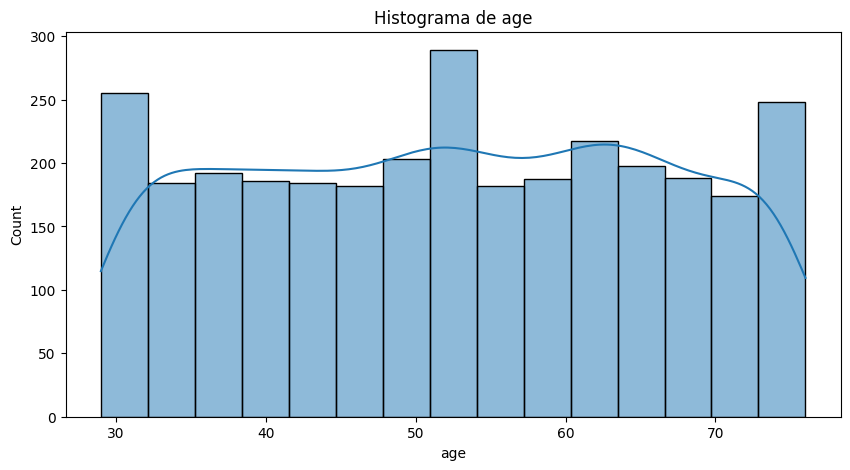

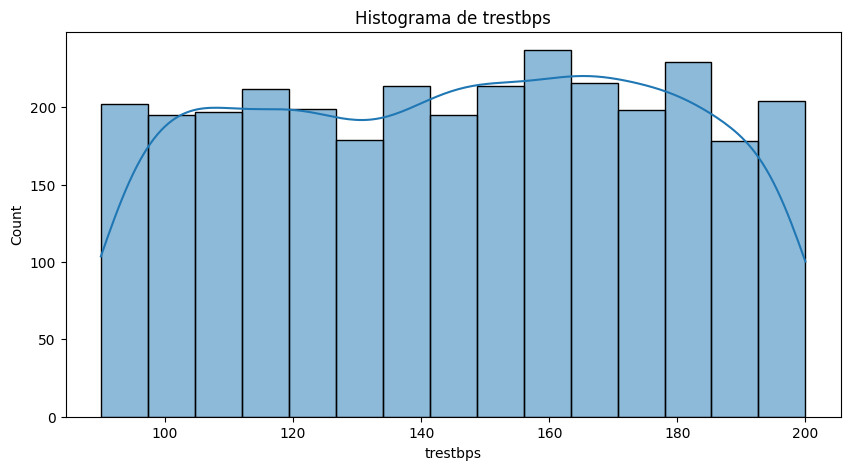

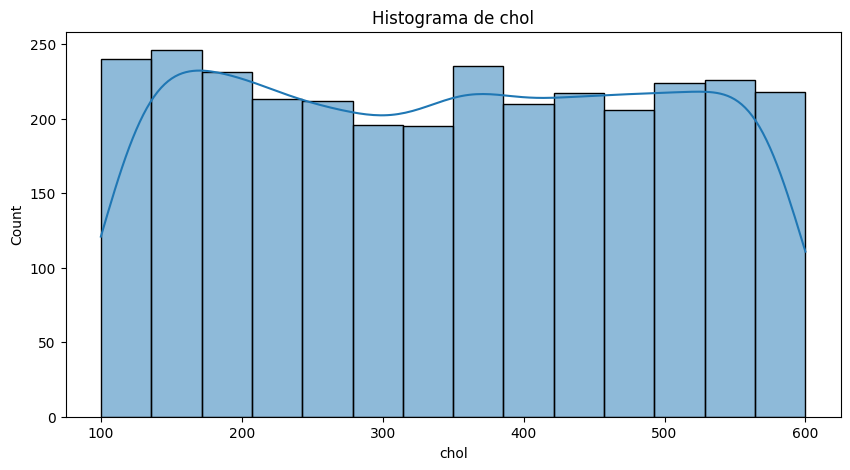

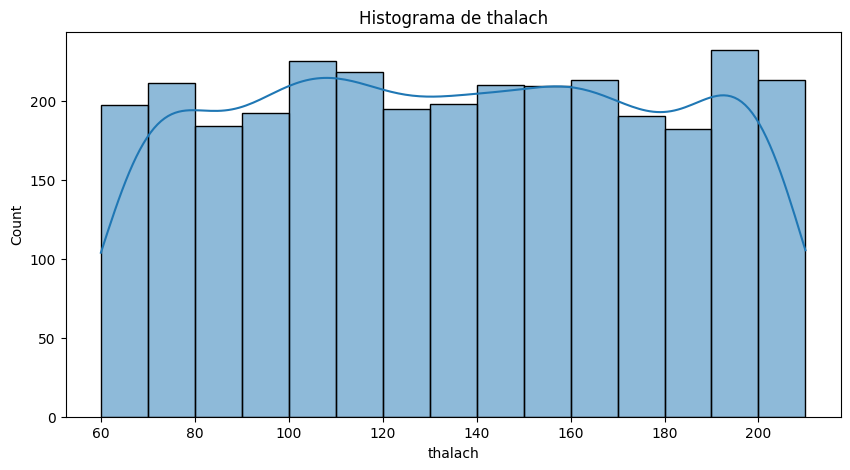

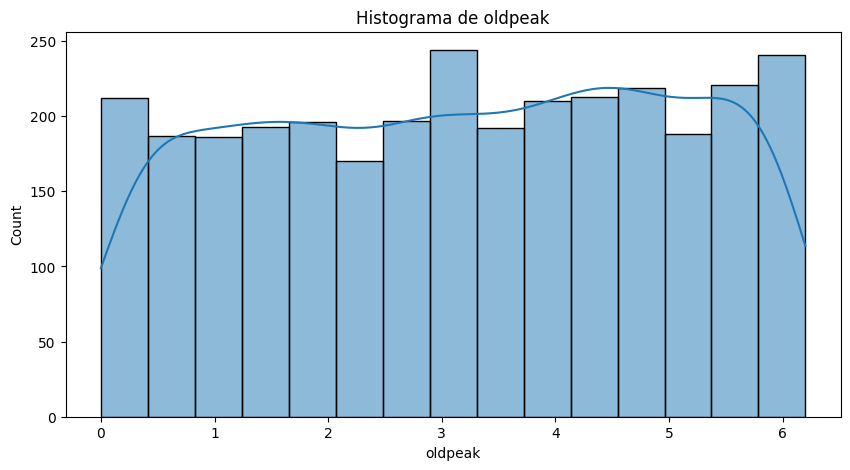

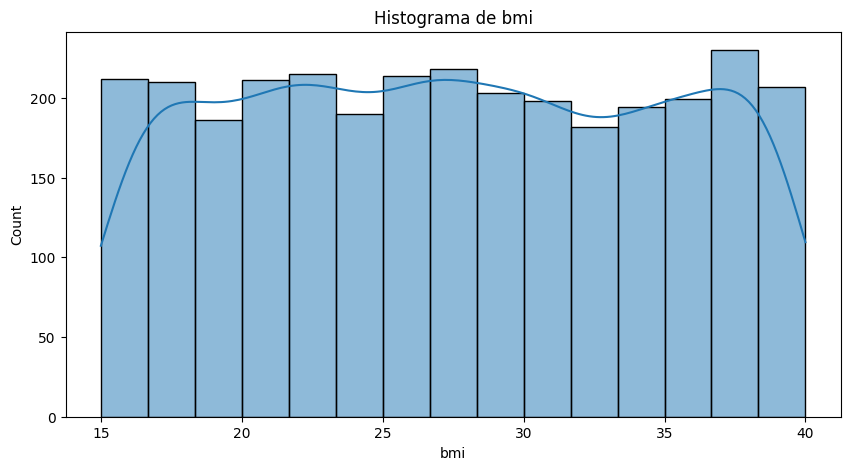

In [23]:
# histplot de MaxHR
for i in df[quantitativos]:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df, x=i, kde=True)
    plt.title(f'Histograma de {i}')
    plt.show()

In [24]:
!pip install missingness
import pandas as pd
import numpy as np
from missingness import induce_missingness

# Fake data
rng = np.random.default_rng(42)
n = 1000
df = pd.DataFrame({
    "age": rng.normal(45, 12, n),
    "bmi": rng.normal(27, 5, n),
    "hba1c": rng.normal(5.6, 0.7, n),
    "glucose": rng.normal(105, 15, n),
    "sex": rng.choice(["F","M"], size=n, p=[0.55,0.45]),
    "target": rng.integers(0,2,n)
})

# 1) MAR-threshold: mais falta quando BMI está no top 30%
df_mar_thr, mask_thr = induce_missingness(
    df, mechanism="MAR-threshold", p=0.25,
    target_cols=["hba1c","glucose"],
    mechanism_kwargs=dict(driver_col="bmi", quantile=0.7, missing_when="high"),
    random_state=123
)

# 2) MAR-logistic: depende de combinação linear de ['age','bmi','hba1c']
df_mar_log, mask_log = induce_missingness(
    df, mechanism="MAR-logistic", p=0.2,
    target_cols=["hba1c","glucose"],
    mechanism_kwargs=dict(driver_cols=["age","bmi","hba1c"], strength=2.0),
    random_state=123
)

# 3) MAR-group: diferentes taxas por 'sex'
df_mar_group, mask_grp = induce_missingness(
    df, mechanism="MAR-group", p=0.2,
    target_cols=["hba1c","glucose"],
    mechanism_kwargs=dict(group_col="sex", group_probs={"F":0.30,"M":0.08}),
    random_state=123
)

ERROR: Could not find a version that satisfies the requirement missingness (from versions: none)
ERROR: No matching distribution found for missingness


ModuleNotFoundError: No module named 'missingness'

In [26]:
df_quant = df[quantitativos].copy()
# df_quant = df_quant.drop(['AGE_PERCENTIL'], axis=1)
corr_arr = []

i_max = 0
i_max1 = 0
i_max2 = 0
i_min = 0
i_min1 = 0
i_min2 = 0
max_value = 0
min_value = 0
almost_zero = 1
i_az = 0
i_az1 = 0
i_az2 = 0
max_value1 = 0
min_value1 = 0
almost_zero1 = 1

correlations = {}
for col in df_quant.columns:
    correlations[col] = df_quant[col].corr(df['heart_disease'])

# Identifica as colunas de maior, menor e quase zero correlação
max_col = max(correlations, key=lambda k: correlations[k])
min_col = min(correlations, key=lambda k: correlations[k])
az_col = min(correlations, key=lambda k: abs(correlations[k]))  # mais próximo de zero

max_value = correlations[max_col]
min_value = correlations[min_col]
almost_zero = correlations[az_col]

print(f'Maior correlação: {max_col}: {max_value}')
print(f'Menor correlação: {min_col}: {min_value}')
print(f'Cor. quase zero: {az_col}: {almost_zero}')


reg = LinearRegression()

for i in range(len(df_quant.columns) - 1):
    num = df_quant.iloc[i].corr(df_quant.iloc[i+1])
    if max_value1 == 0 or num > max_value1:
        max_value1 = num
        i_max1 = df_quant.columns[i]
        i_max2 = df_quant.columns[i+1]
    elif min_value1 == 0 or num < min_value1:
        min_value1 = num
        i_min1 = df_quant.columns[i]
        i_min2 = df_quant.columns[i+1]
    elif -0.05 < num < 0.05:
        almost_zero1 = num
        i_az1 = df_quant.columns[i]
        i_az2 = df_quant.columns[i+1]

print(f'{i_max1, i_max2}: {max_value1}')
print(f'{i_min1, i_min2}: {min_value1}')
print(f'{i_az1, i_az2}: {almost_zero1}')

Maior correlação: age: 0.286730815225771
Menor correlação: oldpeak: -0.014341208719766595
Cor. quase zero: trestbps: -0.0022598417382406638
('chol', 'thalach'): 0.9750039369967164
('thalach', 'oldpeak'): 0.6832699203764941
(0, 0): 1


In [27]:
df_quant.corr()

,age,trestbps,chol,thalach,oldpeak,bmi
age,1.000000,0.035303,0.001722,-0.023883,0.033059,-0.029525
trestbps,0.035303,1.000000,-0.005646,-0.009357,0.025071,-0.000278
chol,0.001722,-0.005646,1.000000,0.051841,-0.016972,-0.015417
thalach,-0.023883,-0.009357,0.051841,1.000000,-0.030678,-0.001801
oldpeak,0.033059,0.025071,-0.016972,-0.030678,1.000000,0.008510
bmi,-0.029525,-0.000278,-0.015417,-0.001801,0.008510,1.000000


In [28]:
df[quantitativos].describe()

,age,trestbps,chol,thalach,oldpeak,bmi
count,3069.00000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000
mean,52.50114,145.306289,347.219941,135.157380,3.189052,27.496839
std,13.70752,31.602321,146.853319,43.353197,1.802815,7.281731
min,29.00000,90.000000,100.000000,60.000000,0.000000,15.000000
25%,41.00000,118.000000,215.000000,98.000000,1.600000,21.300000
50%,53.00000,146.000000,350.000000,135.000000,3.200000,27.400000
75%,64.00000,172.000000,475.000000,172.000000,4.700000,33.900000
max,76.00000,200.000000,600.000000,210.000000,6.200000,40.000000


In [29]:
def compare (df1, df2, class_data = None):
    mean= df2.mean() - df1.mean()
    std= df2.std() - df1.std()
    median = df2.median() - df1.median()
    minim = df2.min() - df1.min()
    maxim = df2.max() - df1.max()
    
    # @grellert: adicionando correlacao
    if class_data is not None:
        corr = df2.corr(class_data)
        return [mean, std, median, minim, maxim, corr]
    return [mean, std, median, minim, maxim]

In [61]:
def imputation_test (k,df,col,method):
    n_rows = df.shape[0]
    df_compare = []
    
    k_ = int(n_rows*k/100)
    to_nan = rd.sample(range(n_rows), k_)  # seleciona aleatorimente k% do numero de linhas total
    
    df_nan[col].iloc[to_nan] = np.nan  

    df_nan = df.copy(deep=True)
    candidates = df_nan.index[df_nan[col].notna()].to_numpy()

    if method == 'mean':
        df_nan[col] = df_nan[col].replace(np.nan, df_nan[col].mean())

    elif method == 'median':
        imputer = SimpleImputer(strategy = 'median')
        imputer = imputer.fit(np.array(df_nan[col]).reshape(-1,1))
        df_nan[col] = imputer.transform(np.array(df_nan[col]).reshape(-1,1))
        
    # @grellert: tornando o método mais expansível
    elif method.split('_')[0] == 'knn' in method:
        n = int(method.split('_')[1])
        imputer = KNNImputer(n_neighbors = n)
        imputed_data = imputer.fit_transform(df_nan)
        df_temp = pd.DataFrame(imputed_data)
        df_temp.columns = df_nan.columns
        df_nan = df_temp.copy()  # update only the desired column
        
    # elif method == 'missforest':
    #     imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=0)
    #     imputed_data = imputer.fit_transform(df_nan)
    #     df_temp = pd.DataFrame(imputed_data)
    #     df_temp.columns = df_nan.columns
    #     df_nan[col] = df_temp[col]
        
    elif method == 'mice': ##still incorrect
        imp_mean = IterativeImputer()
        # recebe todo o DataFrame e retorna um np.array com todas as colunas com missing imputadas
        array_imp = imp_mean.fit_transform(df_nan)
        df_nan = pd.DataFrame(array_imp, columns = df_nan.columns)
    
    elif method == 'empty':
        return df_nan
        
    else:
        print("method not available or invalid")
        return None
   
    return df_nan
        

In [54]:
def test_column(df_nan, col, method, class_col = None):
    compare_means = []
    compare_data = []
    k = [x for x in range(10,60,10)]
    for j in range(len(k)):
        for i in range(50):
            df_imp = df_nan.copy()
            df_imp = imputation_test(k[j], df_imp, col, method)
            if df_imp is None:
                continue
            row = [method, k[j], col]
            row += compare(df[col], df_imp[col], class_data = df[class_col])
            compare_data.append(row)
    if class_col:
        return pd.DataFrame(compare_data, columns = ['imputation method', 'pct imputed', 'attribute', 'Δmean', 'Δstd', 'Δmedian', 'Δmin', 'Δmax','correl' ])
    return pd.DataFrame(compare_data, columns = ['imputation method', 'pct imputed', 'attribute', 'Δmean', 'Δstd', 'Δmedian', 'Δmin', 'Δmax' ])
    

In [55]:
def generate_results(df_nan, method):
    data = [] # array que armazenará os dados do dataframe resultante
    data_ = []
    df_vis1 = [] # array que armazenará o df resultante de cada coluna de df_nan
    for col in df_nan.columns:
        print(col)
        data = test_column(df_nan, col, method, class_col = 'heart_disease')
        df_vis1.append(pd.DataFrame(data = data))
    print("done")
    df_vis = pd.concat(df_vis1)
    return df_vis

# Teste de imputação

In [57]:
df_quant = df[quantitativos]
df_quant.drop(['age'], axis=1, inplace=True)
df_vis1 = generate_results(df_quant, 'mean')
df_vis2 = generate_results(df_quant, 'median')
df_vis3 = generate_results(df_quant, 'knn_5')
df_vis4 = generate_results(df_quant, 'knn_7')
df_vis5 = generate_results(df_quant, 'mice')
# df_vis6 = generate_results(df_quant, 'missforest')
df_vis7 = generate_results(df_quant, 'empty')

trestbps
chol
thalach
oldpeak
bmi
done
trestbps
chol
thalach
oldpeak
bmi
done
trestbps
chol
thalach
oldpeak
bmi
done
trestbps
chol
thalach
oldpeak
bmi
done
trestbps
chol
thalach
oldpeak
bmi
done
trestbps
chol
thalach
oldpeak
bmi
done


In [58]:
df_vis = pd.concat([df_vis1, df_vis2, df_vis3, df_vis4, df_vis5,  df_vis7])

In [50]:
def generate_vis(df_vis, coluna, value):
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20,25))
    
    sns.boxplot(ax=axes[0], x = 'pct imputed', y = 'Δmean', hue = 'imputation method', data = df_vis[df_vis['attribute'] == coluna], palette="pastel"); 
    sns.boxplot(ax=axes[1], x = 'pct imputed', y = 'Δmedian', hue = 'imputation method', data = df_vis[df_vis['attribute'] == coluna], palette="pastel"); 
    sns.boxplot(ax=axes[2], x = 'pct imputed', y = 'Δstd', hue = 'imputation method', data = df_vis[df_vis['attribute'] == coluna], palette="pastel"); 
    sns.boxplot(ax=axes[3], x = 'pct imputed', y = 'correl', hue = 'imputation method', data = df_vis[df_vis['attribute'] == coluna], palette="pastel",showfliers = False); 

    axes[0].set_title(coluna)
    axes[1].set_title(coluna)
    axes[2].set_title(coluna)
    axes[3].set_title(coluna)
    
        
    axes[0].axhline(y=0, linestyle = '--')
    axes[1].axhline(y=0, linestyle = '--')
    axes[2].axhline(y=0, linestyle = '--')
    axes[3].axhline(y=value, linestyle = '--')
    # axes[3].axhline(y=1, linestyle = '--')
    # axes[3].axhline(y=-1, linestyle = '--')

In [51]:
def generate_vis_imp(df_vis, col):
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,25))
    
    sns.boxplot(ax=axes[0], x = 'pct imputed', y = 'Δmean', hue = 'imputation method', data = df_vis, palette="pastel", showfliers = False);  
    sns.boxplot(ax=axes[1], x = 'pct imputed', y = 'Δmedian', hue = 'imputation method', data = df_vis, palette="pastel", showfliers = False); 
    sns.boxplot(ax=axes[2], x = 'pct imputed', y = 'Δstd', hue = 'imputation method', data = df_vis, palette="pastel", showfliers = False); 

    axes[0].set_title(col)
    axes[0].axhline(y=0, linestyle = '--')
    axes[1].axhline(y=0, linestyle = '--')
    axes[2].axhline(y=0, linestyle = '--')


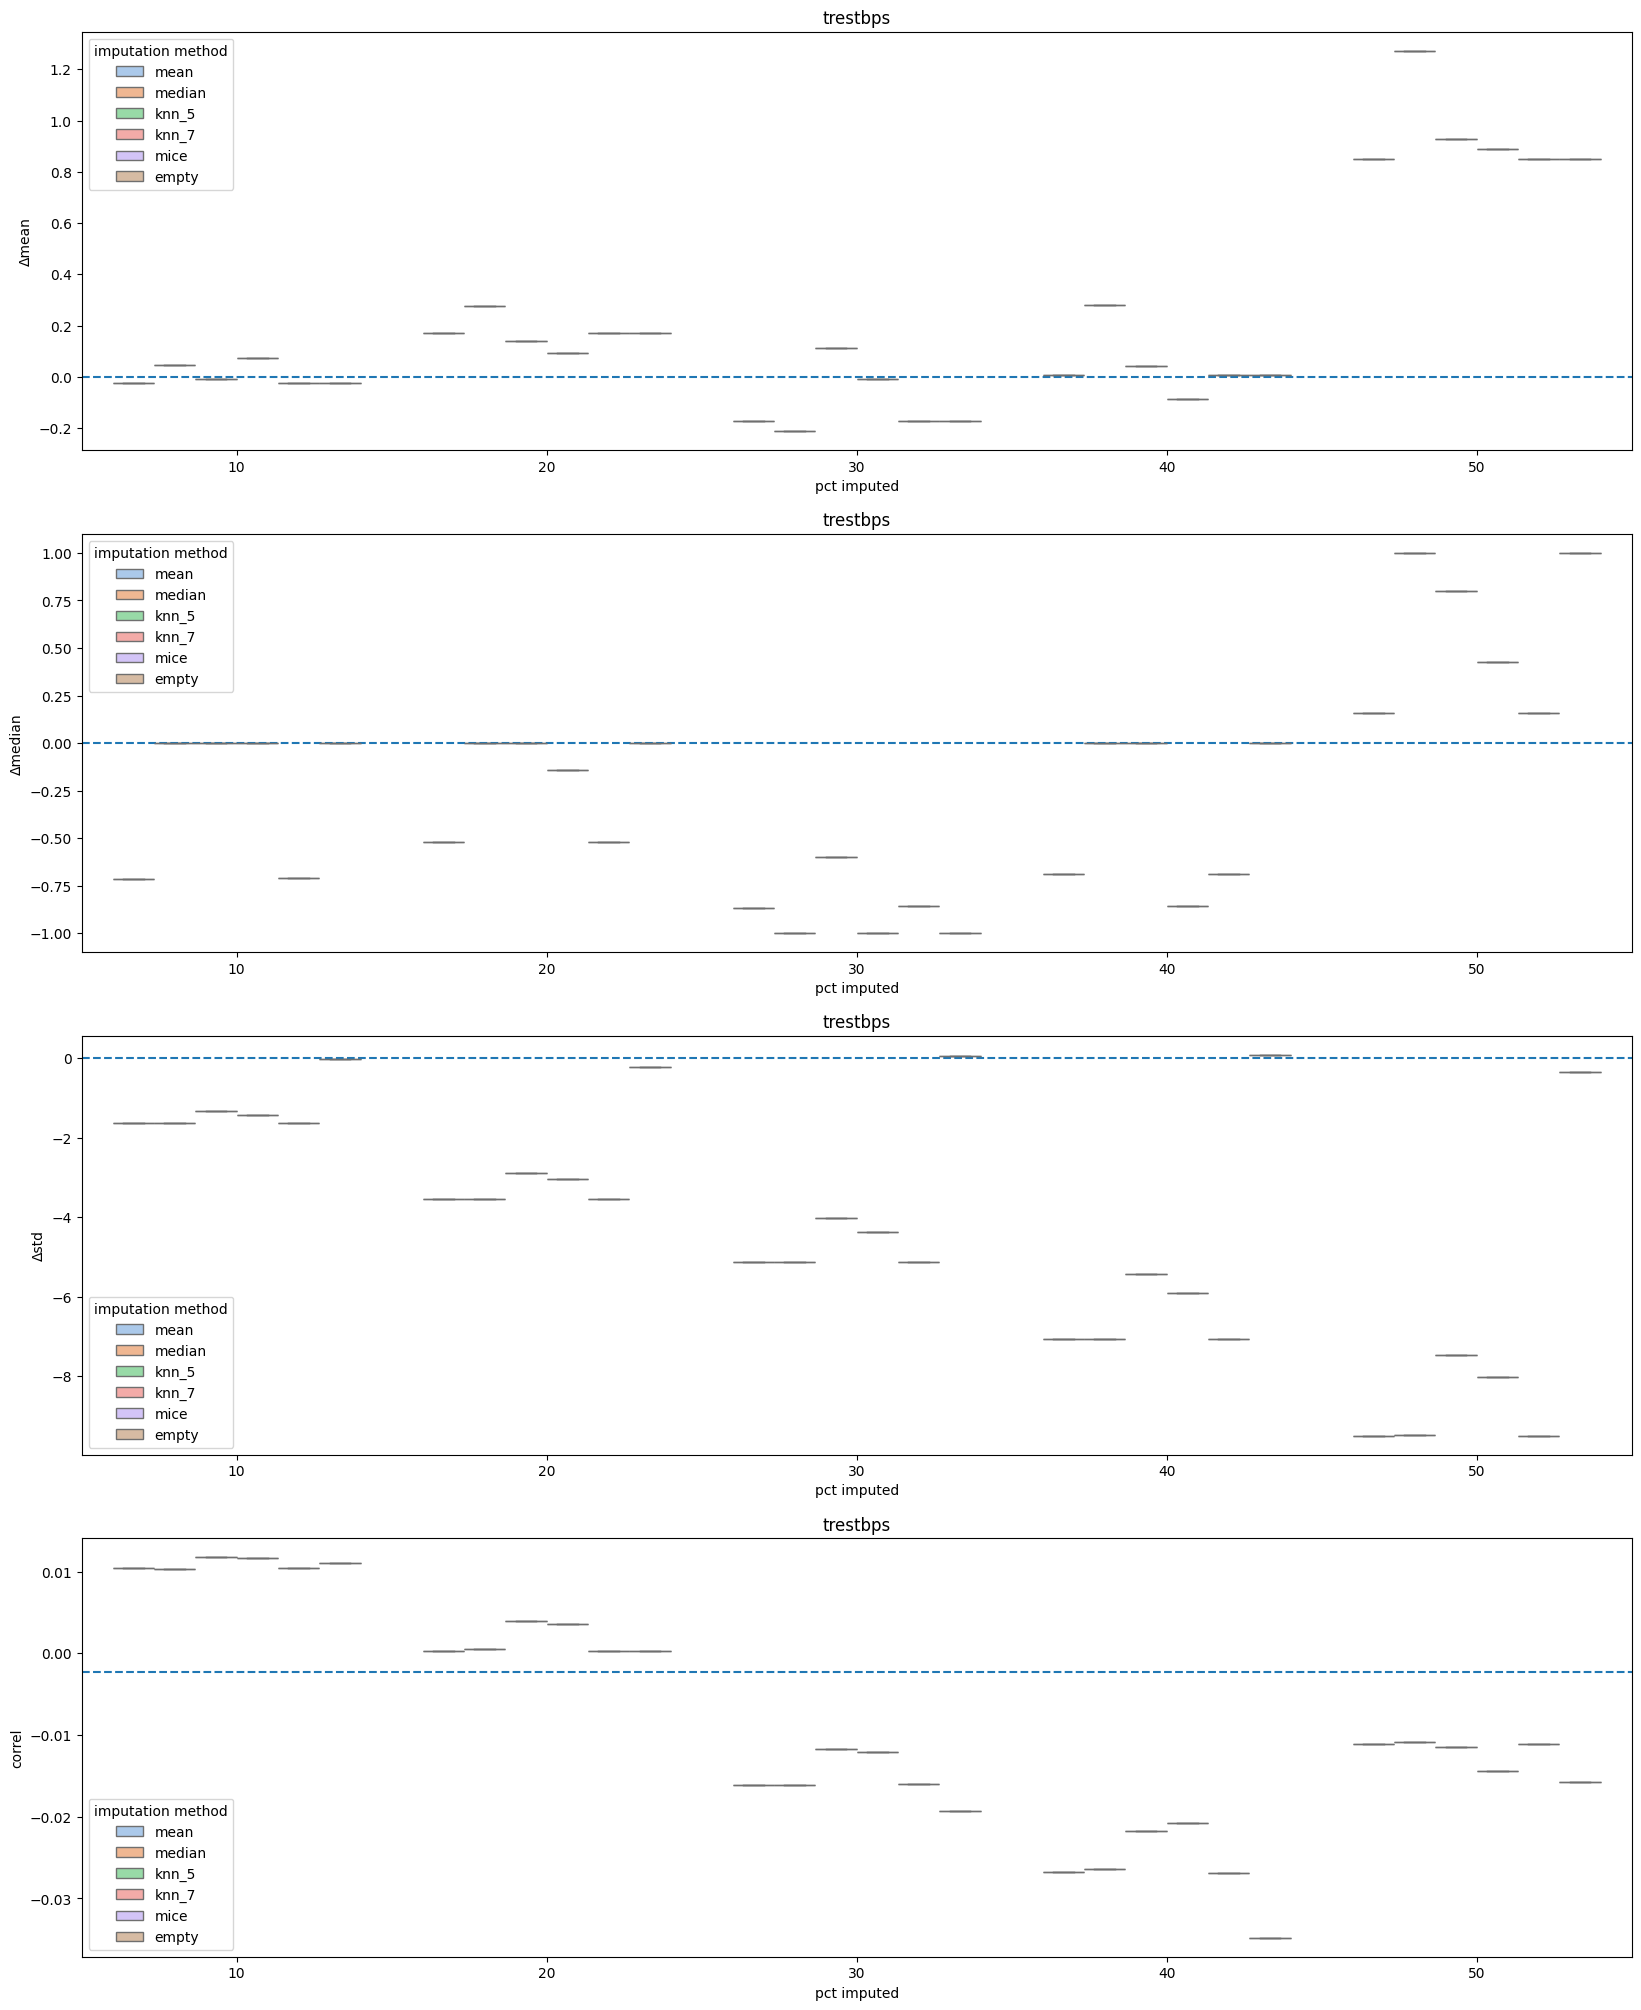

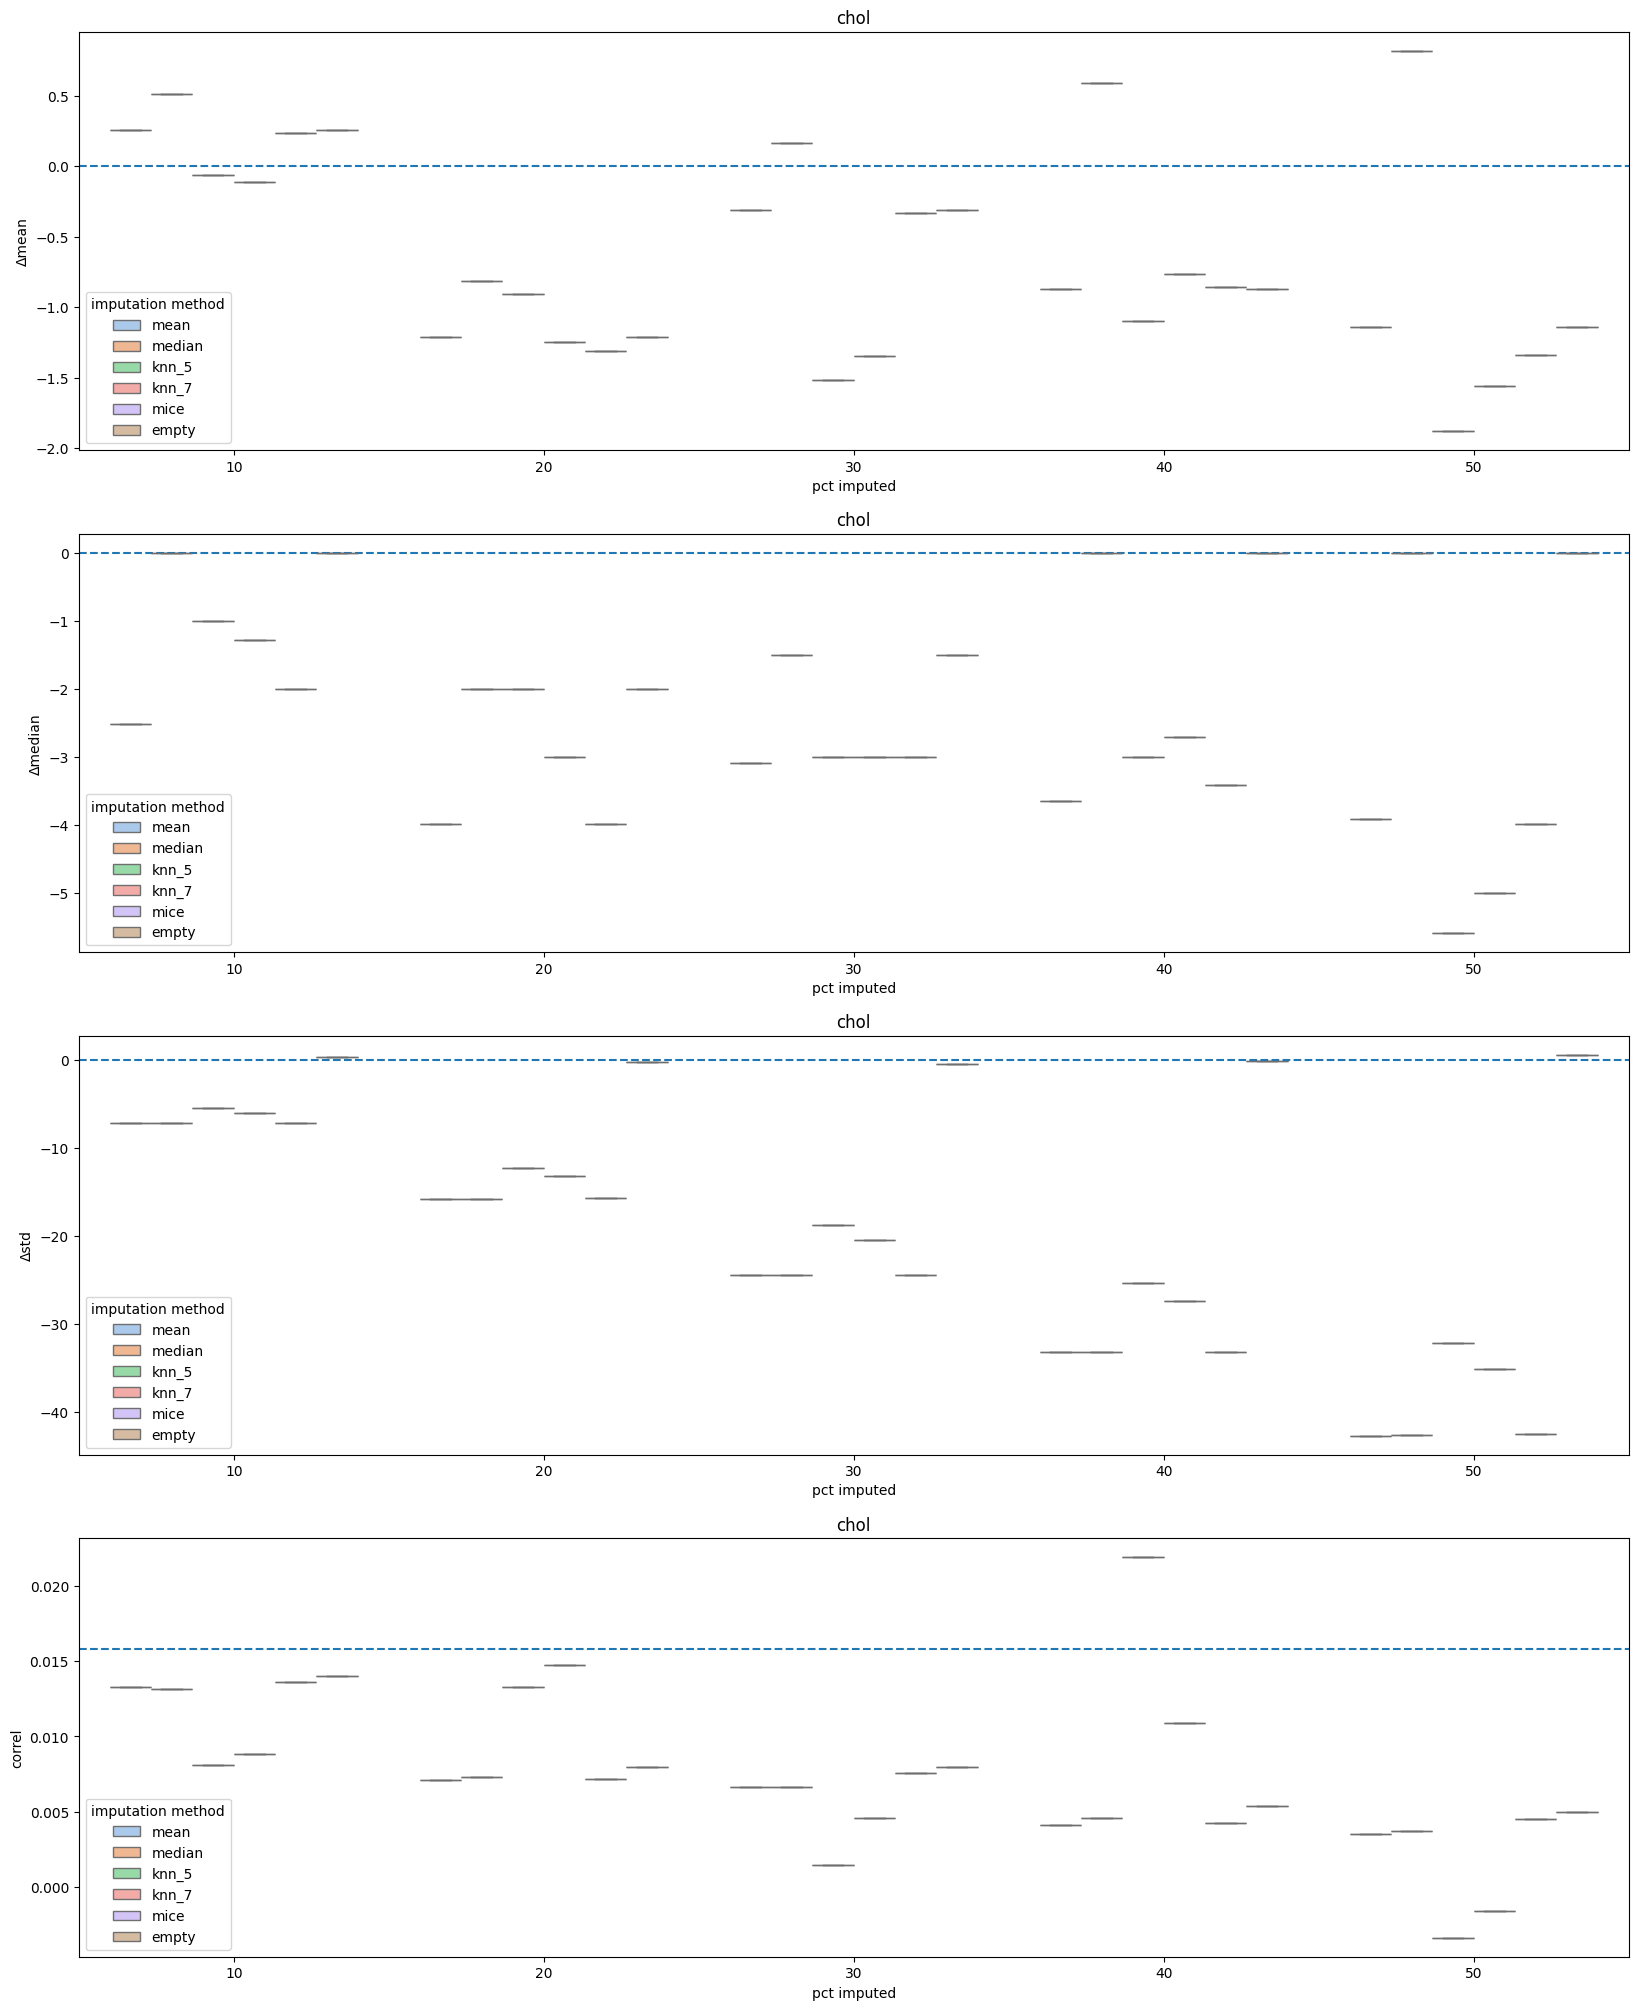

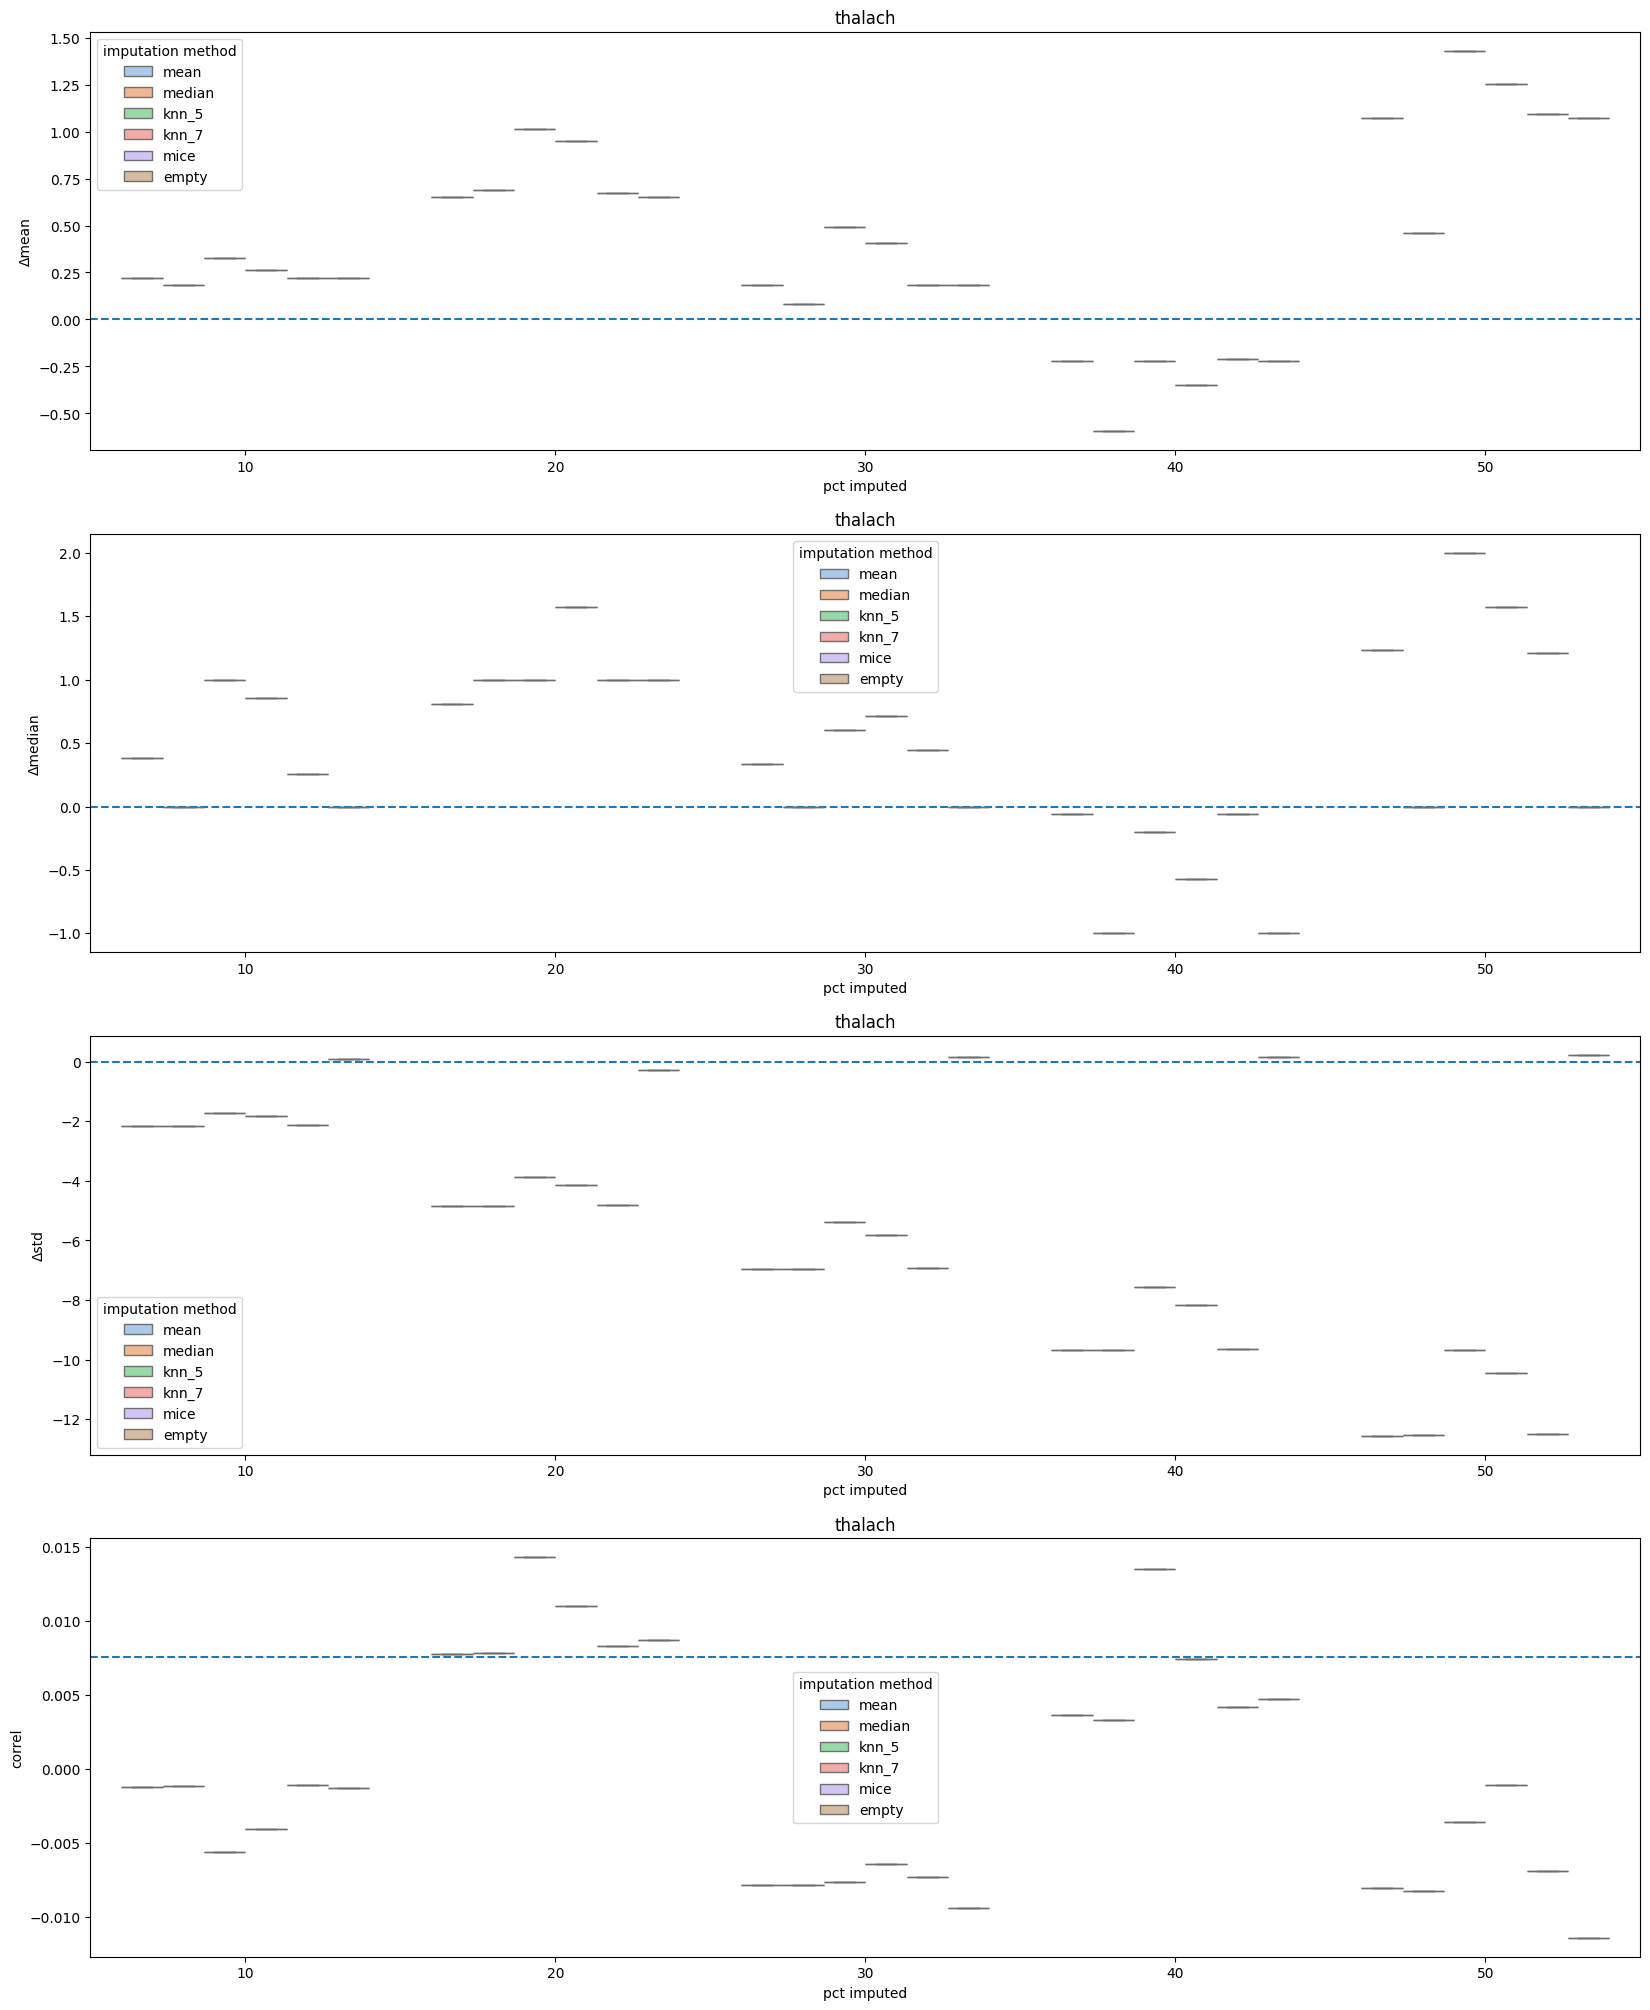

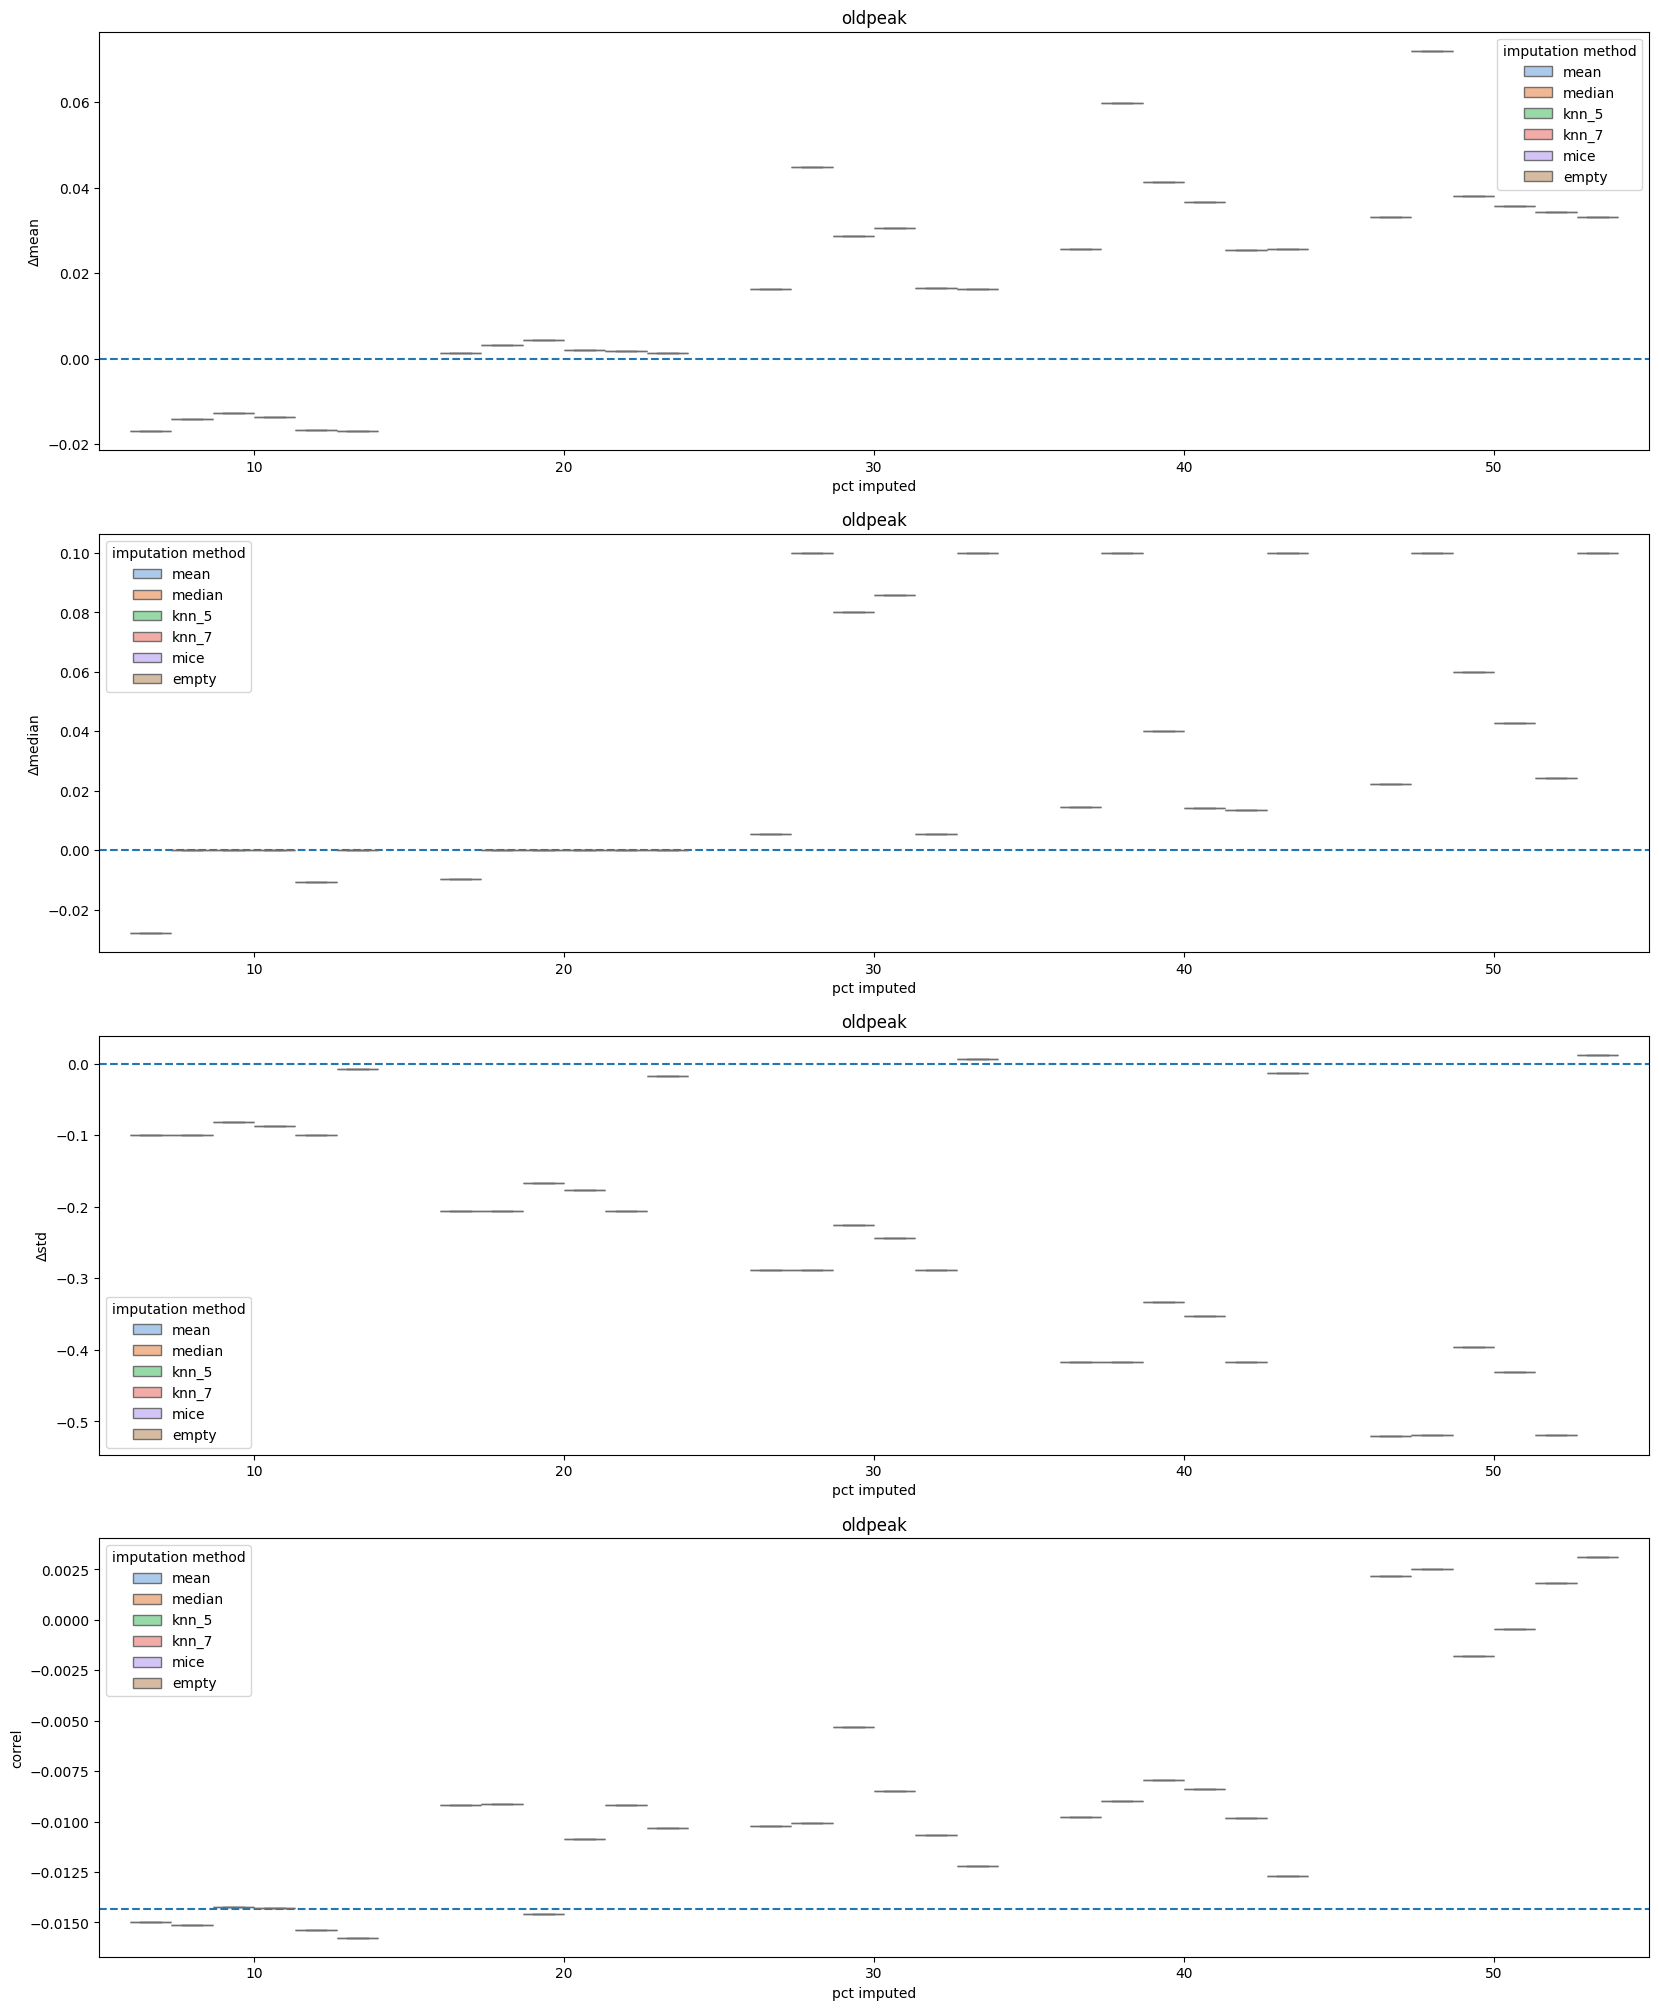

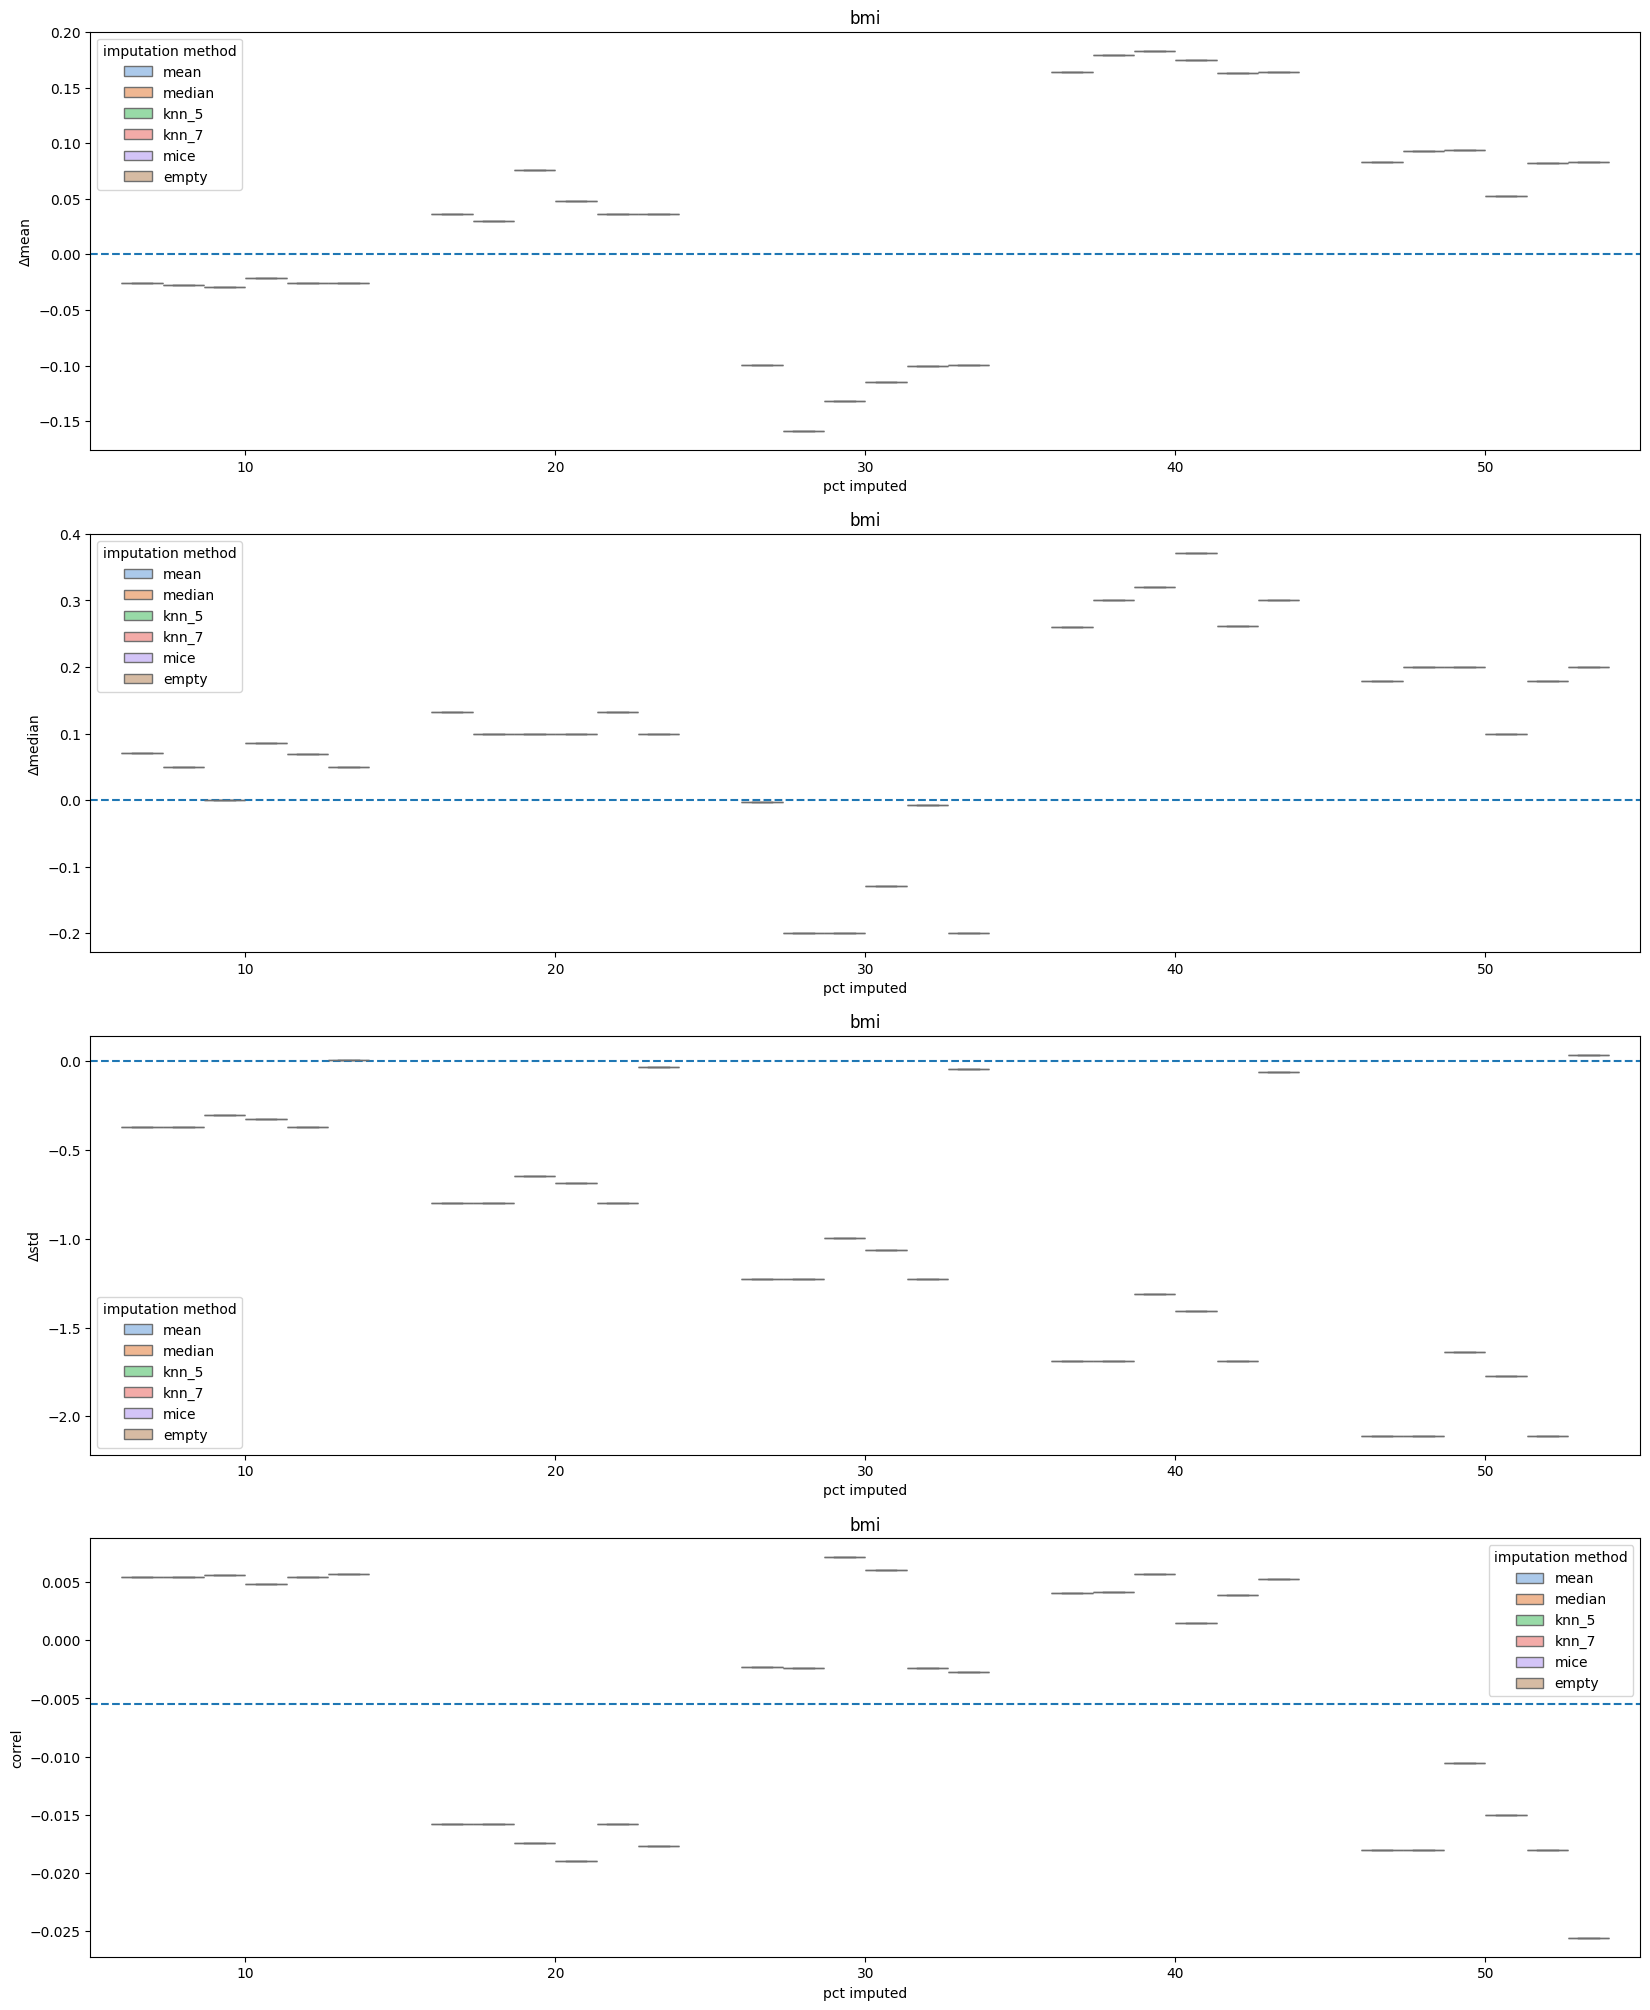

In [59]:
for col in df_quant:
    if col == max_col:
        value = max_value
    elif col == min_col:
        value = min_value
    elif col == az_col:
        value = almost_zero
    else:
        value = correlations[col]
    generate_vis(df_vis, col, value)

In [41]:
for i in df_quant.columns:
    print(i)

# for i in df_quant.columns:
#     if i == 'RESPIRATORY_RATE_MAX':
#         value = max_value
#     elif i == 'LACTATE_MEDIAN':
#         value = min_value
#     elif i == 'OXYGEN_SATURATION_MEDIAN':
#         value = almost_zero
#     generate_vis(df_vis, i, value)
    

Age
RestingBP
Cholesterol
MaxHR
Oldpeak


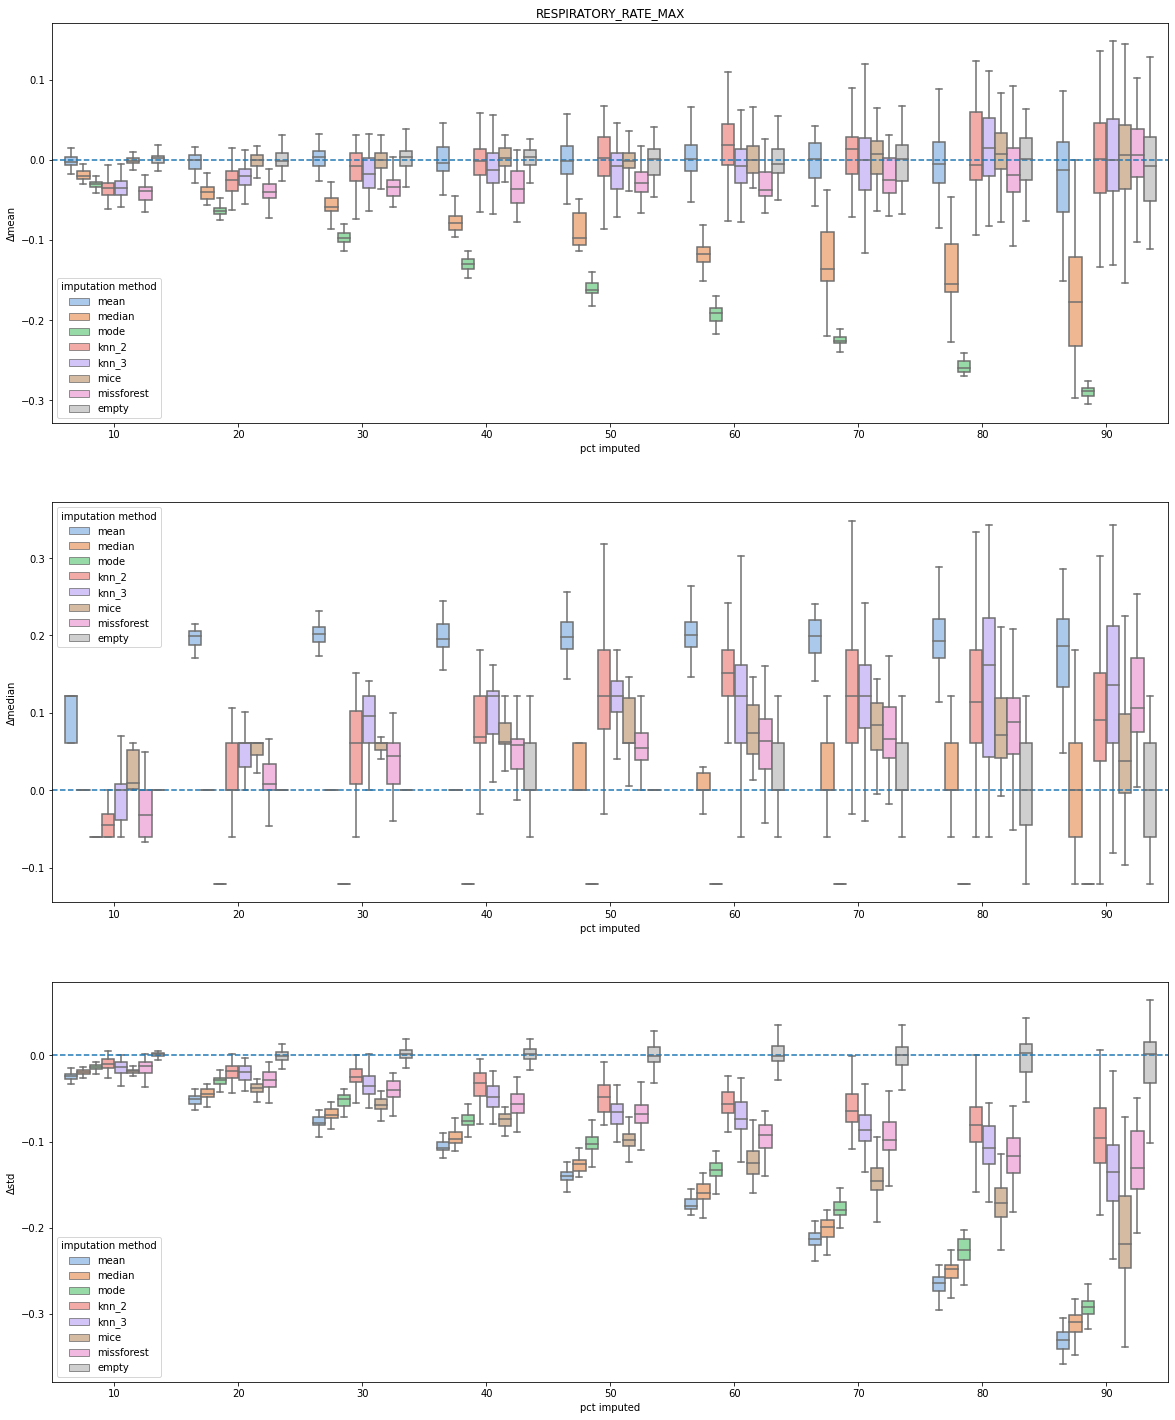

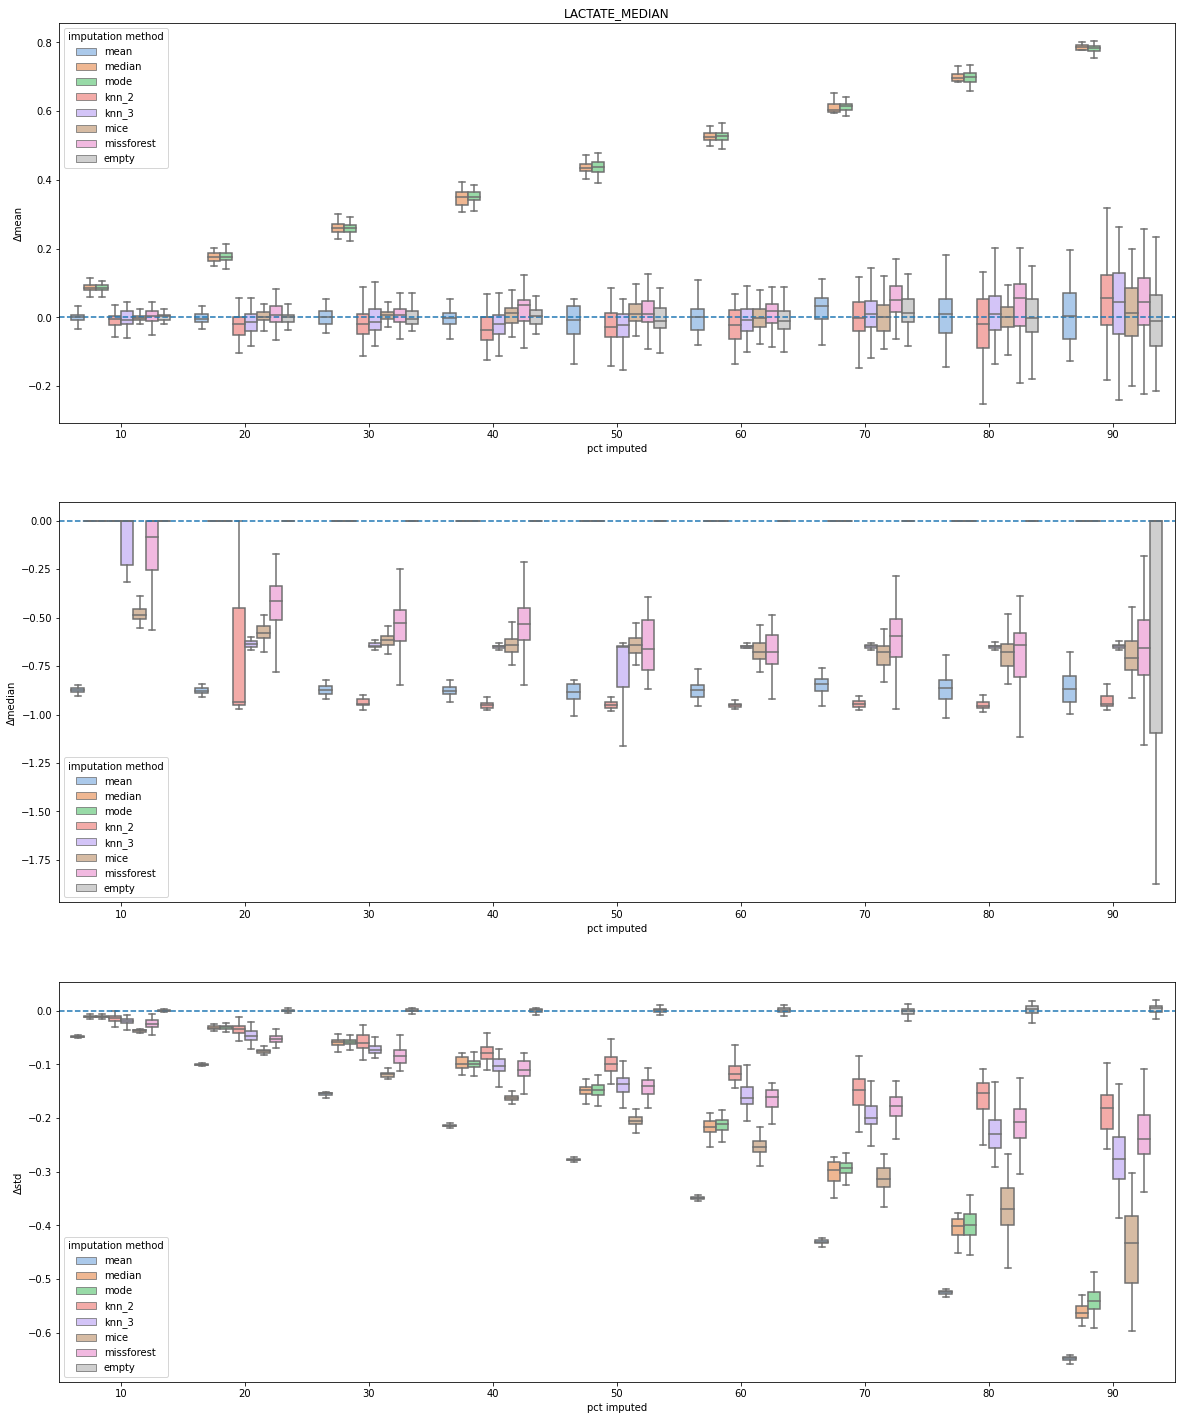

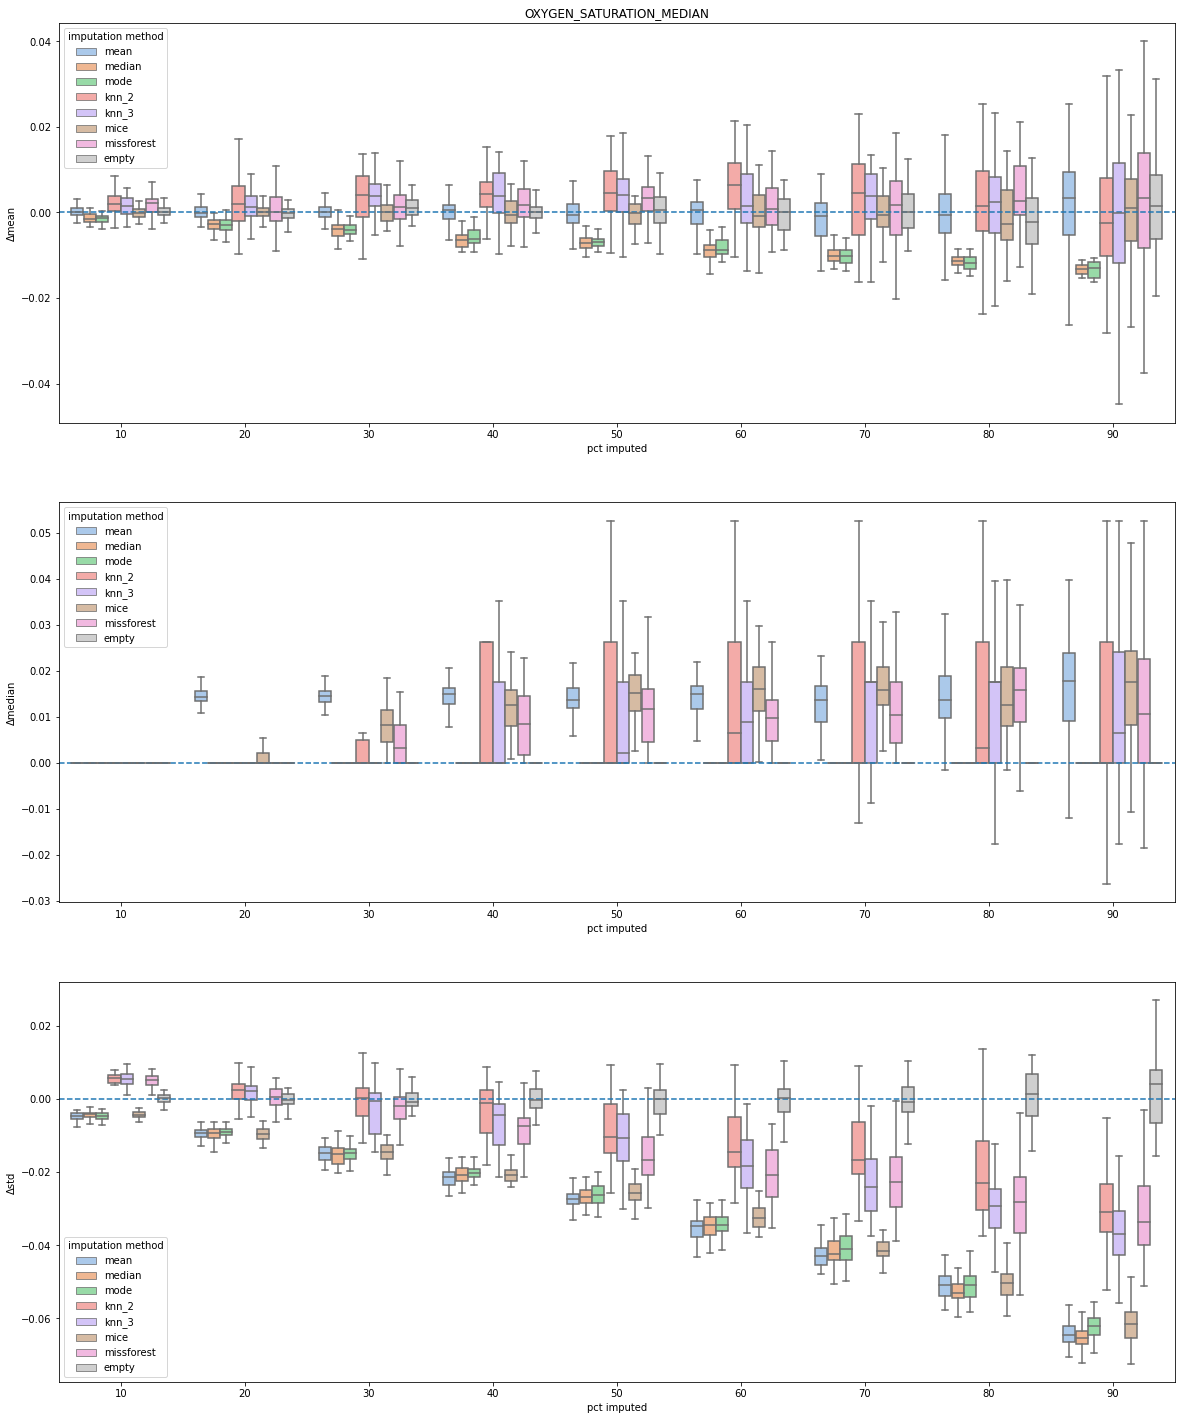

In [48]:
for i in df_2.columns:
    generate_vis_imp(df_vis[df_vis['attribute'] == i], i)

In [ ]:
df_2 = df[['TGO_MAX']].copy()
df_vis1 = generate_results(df_2, 'mean')
df_vis2 = generate_results(df_2, 'median')
df_vis3 = generate_results(df_2, 'mode')
df_vis4 = generate_results(df_2, 'knn_2')
df_vis5 = generate_results(df_2, 'knn_3')
# df_vis5 = generate_results(df, 'mice')

In [ ]:
df_vis6 = generate_results(df_2, 'mice')

In [ ]:
df_vis7 = generate_results(df_2, 'missforest')

In [ ]:
df_vis7 = generate_results(df_2, 'empty')

In [ ]:
df_vis = pd.concat([df_vis1, df_vis2, df_vis3, df_vis4, df_vis5, df_vis6, df_vis7])

In [ ]:
for i in df_2.columns:
    generate_vis(df_vis, i, max_value1)